# Stacks, Queues and Deques

In [57]:
from pathlib import Path

In [58]:
p = Path('/Users/olli/Desktop/PythonNotebooks')
sub_dir = 'pics'
pics = p/sub_dir
pics

WindowsPath('/Users/olli/Desktop/PythonNotebooks/pics')

**Stacks (LIFO)** are fundamentally important as they can be used to reverse the order of items

The order of insertion is the reverse of the order of removal. 

**Uses of stacks**
* webpages 
* applications 
* parenthesis handling

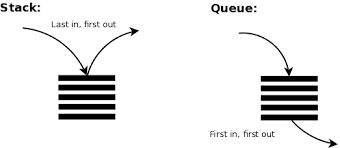

In [59]:
from IPython.display import Image
filename = 'FIFO-LIFO.png'
Image(pics/filename)

## Implementation of Stack

### Stack Attributes and Methods

Before we implement our own Stack class, let's review the properties and methods of a Stack.

The stack abstract data type is defined by the following structure and operations. A stack is structured, as described above, as an ordered collection of items where items are added to and removed from the end called the “top.” Stacks are ordered LIFO. The stack operations are given below.

* Stack() creates a new stack that is empty. It needs no parameters and returns an empty stack.
* push(item) adds a new item to the top of the stack. It needs the item and returns nothing.
* pop() removes the top item from the stack. It needs no parameters and returns the item. The stack is modified.
* peek() returns the top item from the stack but does not remove it. It needs no parameters. The stack is not modified.
* isEmpty() tests to see whether the stack is empty. It needs no parameters and returns a boolean value.
* size() returns the number of items on the stack. It needs no parameters and returns an integer.

---

## Stack Implementation

In [60]:
class Stack:
    def __repr__(self):
        return str(self.items)
    
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[len(self.items)-1]

    def size(self):
        return len(self.items)

Let's try it out!

In [61]:
s = Stack()
s

[]

In [62]:
print(s.isEmpty())

True


In [63]:
s.push(1)

In [64]:
s.push('two')

In [65]:
s.peek()

'two'

In [66]:
s.push(True)

In [67]:
s.size()

3

In [68]:
s.isEmpty()

False

In [69]:
s.pop()

True

In [70]:
s.pop()

'two'

In [71]:
s.size()

1

In [72]:
s.pop()

1

In [73]:
s.isEmpty()

True

**Queues (FIFO)** 

First in First Out

Enqueue describes the addition of an item to the rear of the queue.

Dequeue describes the removing an item from the front of the queue.

**Uses of Queue**
* Printer requests 
* Call center phone systems 
* Handling of interrupts 

# Implementation of Queue

In this lecture we will build on our previous understanding of Queues by implementing our own class of Queue!

____
## Queue Methods and Attributes


Before we begin implementing our own queue, let's review the attribute and methods it will have:

* Queue() creates a new queue that is empty. It needs no parameters and returns an empty queue.
* enqueue(item) adds a new item to the rear of the queue. It needs the item and returns nothing.
* dequeue() removes the front item from the queue. It needs no parameters and returns the item. The queue is modified.
* isEmpty() tests to see whether the queue is empty. It needs no parameters and returns a boolean value.
* size() returns the number of items in the queue. It needs no parameters and returns an integer.

____
## Queue Implementation

In [74]:
class Queue:
    def __init__(self):
        self.items = []
        
    def __repr__(self):
        return str(self.items)

    def isEmpty(self):
        return self.items == []
    
    # enqueue -> [start ... end] -> dequeue     

    # the rear of the queue is the start of the list
    def enqueue(self, item):
        self.items.insert(0,item)

    # the front of the queue is the end of the list
    def dequeue(self):
        return self.items.pop()

    def size(self):
        return len(self.items)

In [75]:
q = Queue()
q

[]

In [76]:
q.size()

0

In [77]:
q.isEmpty()

True

In [78]:
for n in range(10):
    q.enqueue(n+1)

In [79]:
# FIFO behaviour 
q.dequeue()

1

**Deque (double ended queue)** 

It has two ends a front and a rear. You can add or remove from the front or the rear.

**Uses of Deque**
* Web browser history 
* list of undo operations 
* Job scheduling

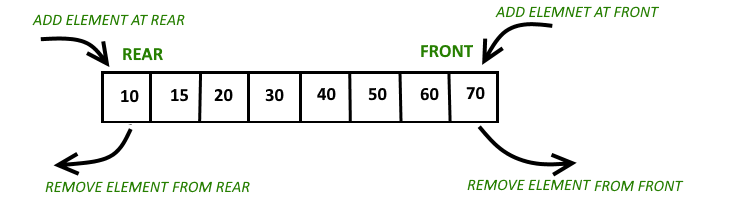

In [80]:
from IPython.display import Image
filename = 'deque.png'
Image(pics/filename)

# Implementation of Deque

In this lecture we will implement our own Deque class!

## Methods and Attributes

* Deque() creates a new deque that is empty. It needs no parameters and returns an empty deque.
* addFront(item) adds a new item to the front of the deque. It needs the item and returns nothing.
* addRear(item) adds a new item to the rear of the deque. It needs the item and returns nothing.
* removeFront() removes the front item from the deque. It needs no parameters and returns the item. The deque is modified.
* removeRear() removes the rear item from the deque. It needs no parameters and returns the item. The deque is modified.
* isEmpty() tests to see whether the deque is empty. It needs no parameters and returns a boolean value.
* size() returns the number of items in the deque. It needs no parameters and returns an integer.

## Deque Implementation

In [81]:
class Deque:
    def __repr__(self):
        return str(self.items)
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def addFront(self, item):
        self.items.append(item)

    def addRear(self, item):
        self.items.insert(0,item)

    def removeFront(self):
        return self.items.pop()

    def removeRear(self):
        return self.items.pop(0)

    def size(self):
        return len(self.items)

In [82]:
d = Deque()
d

[]

In [83]:
d.addFront('hello')

In [84]:
d.addRear('world')

In [85]:
d.size()

2

In [86]:
d.items

['world', 'hello']

In [87]:
print(d.removeFront() + ' ' +  d.removeRear())

hello world


In [88]:
d.size()

0

# Interview Problems

---

# Balanced Parentheses Check - SOLUTION

## Problem Statement

Given a string of opening and closing parentheses, check whether it’s balanced. We have 3 types of parentheses: round brackets: (), square brackets: [], and curly brackets: {}. Assume that the string doesn’t contain any other character than these, no spaces words or numbers. As a reminder, balanced parentheses require every opening parenthesis to be closed in the **reverse order** opened. For example ‘([])’ is balanced but ‘([)]’ is not. 


You can assume the input string has no spaces.

## Solution

This is a very common interview question and is one of the main ways to check your knowledge of using Stacks! We will start our solution logic as such:

First we will scan the string from left to right, and every time we see an opening parenthesis we push it to a stack, because we want the last opening parenthesis to be closed first. (Remember the FILO structure of a stack!)

Then, when we see a closing parenthesis we check whether the last opened one is the corresponding closing match, by popping an element from the stack. If it’s a valid match, then we proceed forward, if not return false. 

Or if the stack is empty we also return false, because there’s no opening parenthesis associated with this closing one. In the end, we also check whether the stack is empty. If so, we return true, otherwise return false because there were some opened parenthesis that were not closed. 

Here's an example solution:

In [89]:
# you need LIFO behaviour

def balance_check(s):
    
    # Check is even number of brackets
    if len(s)%2 != 0:
        return False
    
    # Set of opening brackets
    opening = set('([{') 
    
    # Matching Pairs
    matches = set([ ('(',')'), ('[',']'), ('{','}') ]) 
    
    # Use a list as a "Stack"
    stack = []
    
    # Check every parenthesis in string
    for paren in s:
        # If its an opening, append it to list
        if paren in opening:
            stack.append(paren)
        
        else:
            # Check that there are parentheses in Stack
            # unbalanced case
            if len(stack) == 0:
                return False
            
            # Check the last open parenthesis
            last_open = stack.pop()
            # Check if it has a closing match
            if (last_open,paren) not in matches:
                return False
    
    # when you are finished there should be nothing left in the stack       
    # what if the last parentheses is unbalanced
    
    return len(stack) == 0

In [90]:
balance_check('()))))')

False

In [91]:
balance_check('[()]]')

False

In [92]:
balance_check('[](){([[[]]])}')

True

In [93]:
balance_check('()(){[()]}')

True

# Test Your Solution

In [94]:
"""
RUN THIS CELL TO TEST YOUR SOLUTION
"""
from nose.tools import assert_equal

class TestBalanceCheck(object):
    
    def test(self,sol):
        assert_equal(sol('[](){([[[]]])}('),False)
        assert_equal(sol('[{{{(())}}}]((()))'),True)
        assert_equal(sol('[[[]])]'),False)
        print('ALL TEST CASES PASSED')
        
# Run Tests

t = TestBalanceCheck()
t.test(balance_check)

ALL TEST CASES PASSED


---
# Implement a Queue (FIFO) - Using Two Stacks - SOLUTION

Given the Stack class below, implement a Queue class using **two** stacks! Note, this is a "classic" interview problem. Use a Python list data structure as your Stack.

In [95]:
stack1 = []
stack2 = []

## Solution (reverse the order twice)

The **key insight** is that a stack reverses order (while a queue doesn't). A sequence of elements pushed on a stack comes back in reversed order when popped. Consequently, two stacks chained together will return elements in the same order, since reversed order reversed again is original order.

 We use an in-stack that we fill when an element is enqueued and the dequeue operation takes elements from an out-stack. If the out-stack is empty we pop all elements from the in-stack and push them onto the out-stack. 

In [55]:
class Queue2Stacks(object):
    
    def __init__(self):
        
        # Two Stacks
        self.instack = []
        self.outstack = []
     
    def enqueue(self,element):
        
        # Add an enqueue with the "IN" stack
        self.instack.append(element)
    
    def dequeue(self):
        # check to see if empty
        # you wouldn't want to accidentally put something in the front of the queue ie. top of the outstack         
        if not self.outstack:
            # pattern for emptying the instack
            while self.instack:
                # Add the elements to the outstack to reverse the order when called
                self.outstack.append(self.instack.pop())
        return self.outstack.pop()  

# Test Your Solution

You should be able to tell with your current knowledge of Stacks and Queues if this is working as it should. For example, the following should print as such:

In [56]:
"""
RUN THIS CELL TO CHECK THAT YOUR SOLUTION OUTPUT MAKES SENSE AND BEHAVES AS A QUEUE
"""
q = Queue2Stacks()

for i in range(5):
    q.enqueue(i)
    
for i in range(5):
    print(q.dequeue())

0
1
2
3
4
